In [1]:
import pandas as pd
import numpy as np
from lammps import IPyLammps 
import matplotlib.pyplot as plt

Lets create the system and then run some steps so the initial crystalline structure relaxes

In [2]:
L=IPyLammps()
L.units("lj")
L.atom_style("atomic")


L.lattice("fcc", 0.8442)
L.region("box block", 0, 4, 0, 4, 0, 4)
L.create_box(1, "box")
L.create_atoms(1, "box")
L.mass(1, 1.0)

L.velocity("all create", 1.44, 87287, "loop geom")

L.pair_style("lj/cut", 2.5)
L.pair_coeff(1, 1, 1.0, 1.0, 2.5)

L.neighbor(0.3, "bin")
L.neigh_modify("delay 0 every 20 check no")

L.fix("1 all nve")
L.run(0)

LAMMPS output is captured by PyLammps wrapper


[u'Neighbor list info ...',
 u'  update every 20 steps, delay 0 steps, check no',
 u'  max neighbors/atom: 2000, page size: 100000',
 u'  master list distance cutoff = 2.8',
 u'  ghost atom cutoff = 2.8',
 u'  binsize = 1.4, bins = 5 5 5',
 u'  1 neighbor lists, perpetual/occasional/extra = 1 0 0',
 u'  (1) pair lj/cut, perpetual',
 u'      attributes: half, newton on',
 u'      pair build: half/bin/atomonly/newton',
 u'      stencil: half/bin/3d/newton',
 u'      bin: standard',
 u'Setting up Verlet run ...',
 u'  Unit style    : lj',
 u'  Current step  : 0',
 u'  Time step     : 0.005',
 u'Per MPI rank memory allocation (min/avg/max) = 2.618 | 2.618 | 2.618 Mbytes',
 u'Step Temp E_pair E_mol TotEng Press ',
 u'       0         1.44   -6.7733681            0   -4.6218056   -5.0244179 ',
 u'Loop time of 9.53674e-07 on 1 procs for 0 steps with 256 atoms',
 u'',
 u'0.0% CPU use with 1 MPI tasks x no OpenMP threads',
 u'',
 u'MPI task timing breakdown:',
 u'Section |  min time  |  avg tim

The next is the initial crystalline structure

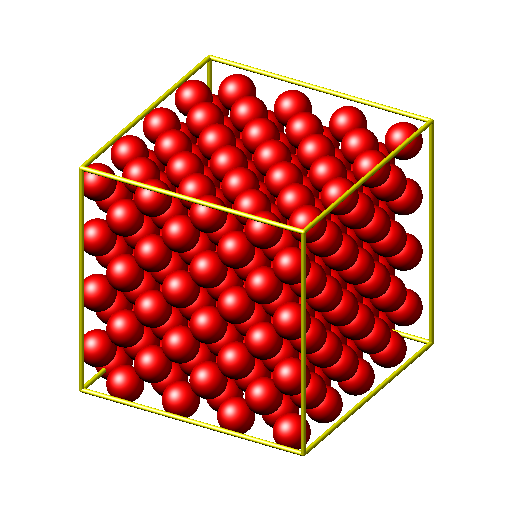

In [3]:
L.image()

Lets relax the system and show it after 100 steps

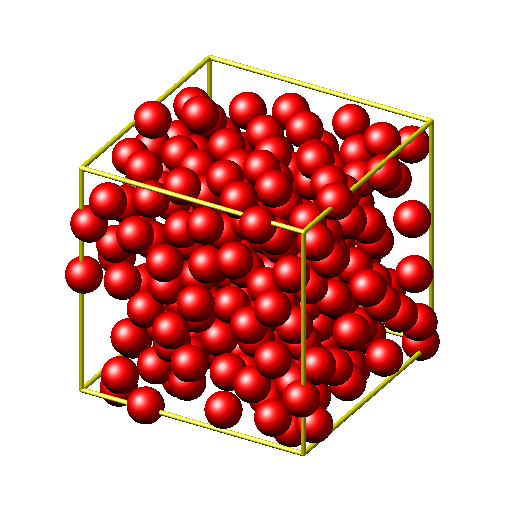

In [4]:
L.run(100)
L.image()

Now lets compute the mean-squared displacement (MSD)

From Lammps documentation compute msd, generates a vector A vector of four quantities is calculated by this compute. The first 3 elements of the vector are the squared dx,dy,dz displacements, summed and averaged over atoms in the group. The 4th element is the total squared displacement, i.e. (dx*dx + dy*dy + dz*dz), summed and averaged over atoms in the group.

In [5]:
L.command("compute msd all msd")
L.run(10)
L.variable("meansqrdisp equal m")

In [ ]:
L.